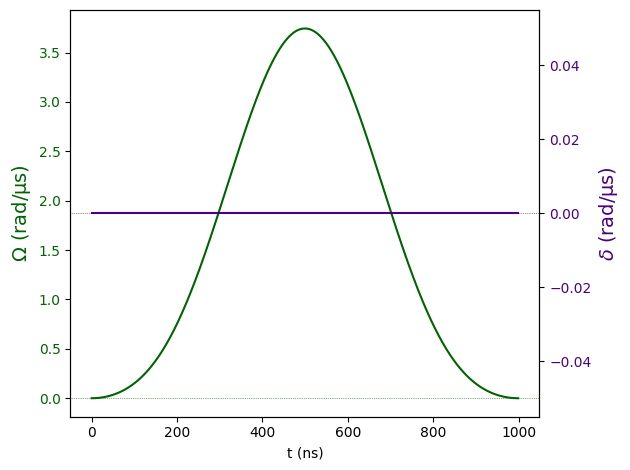

In [10]:
import numpy as np
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice


reg = Register({"q0": (0, 0)})
device = MockDevice
seq = Sequence(reg, device)
seq.available_channels

seq.declare_channel("ch0", "raman_local", initial_target="q0")

# Defining the waveform for a pi/2 pulse
from pulser.waveforms import BlackmanWaveform

pi2_wf = BlackmanWaveform(1000, np.pi / 2)  # Duration: 1us, Area: pi/2
# 2. Create the pi/2 pulse
pi_2 = Pulse.ConstantDetuning(pi2_wf, detuning=0, phase=np.pi / 2)
pi_2.draw()

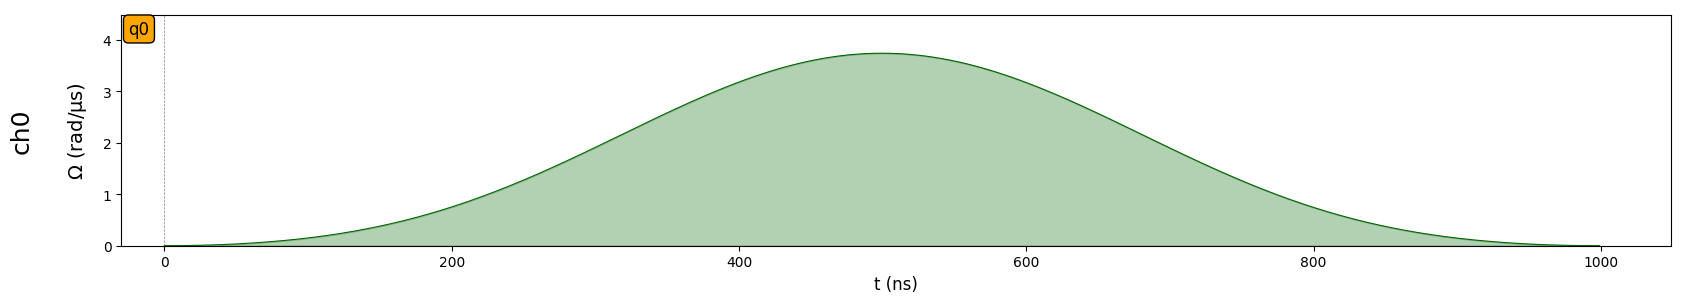

In [11]:
# 3. Applying the H gate

seq.add(pi_2, "ch0")  # The first pi/2-pulse
# Now the phase shift of pi on 'q0', for the 'digital' basis, which is usually where phase shifts are useful
seq.phase_shift(np.pi, "q0", basis="digital")

seq.draw(draw_phase_shifts=True)

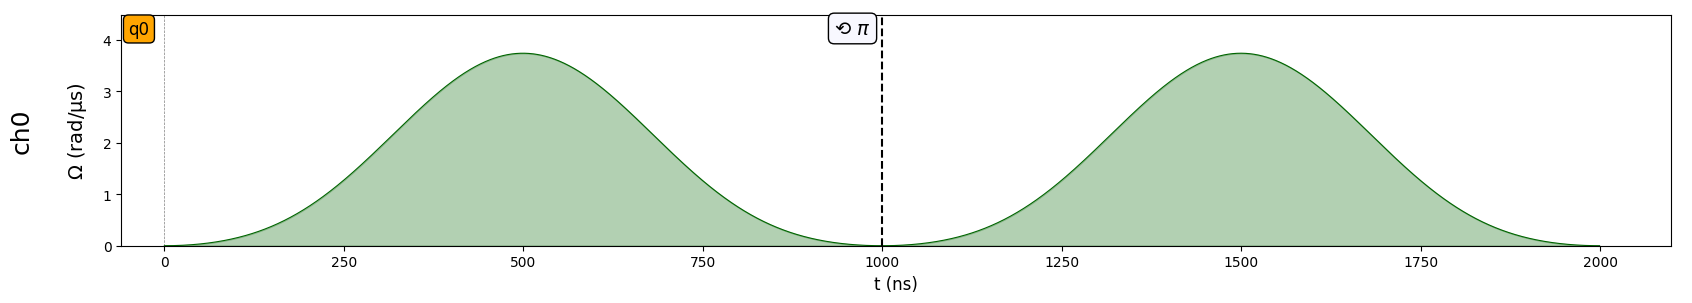

In [12]:
h = Pulse.ConstantDetuning(
    pi2_wf, detuning=0, phase=np.pi / 2, post_phase_shift=np.pi
)

seq.add(h, "ch0")
seq.draw(draw_phase_shifts=True)

In [13]:
print(seq)


Channel: ch0
t: 0 | Initial targets: q0 | Phase Reference: 0.0 
t: 0->1000 | Pulse(Amp=Blackman(Area: 1.57), Detuning=0 rad/µs, Phase=1.57) | Targets: q0
t: 1000->2000 | Pulse(Amp=Blackman(Area: 1.57), Detuning=0 rad/µs, Phase=4.71) | Targets: q0




In [14]:
seq.add(h, "ch0")
print(seq)

Channel: ch0
t: 0 | Initial targets: q0 | Phase Reference: 0.0 
t: 0->1000 | Pulse(Amp=Blackman(Area: 1.57), Detuning=0 rad/µs, Phase=1.57) | Targets: q0
t: 1000->2000 | Pulse(Amp=Blackman(Area: 1.57), Detuning=0 rad/µs, Phase=4.71) | Targets: q0
t: 2000->3000 | Pulse(Amp=Blackman(Area: 1.57), Detuning=0 rad/µs, Phase=1.57) | Targets: q0




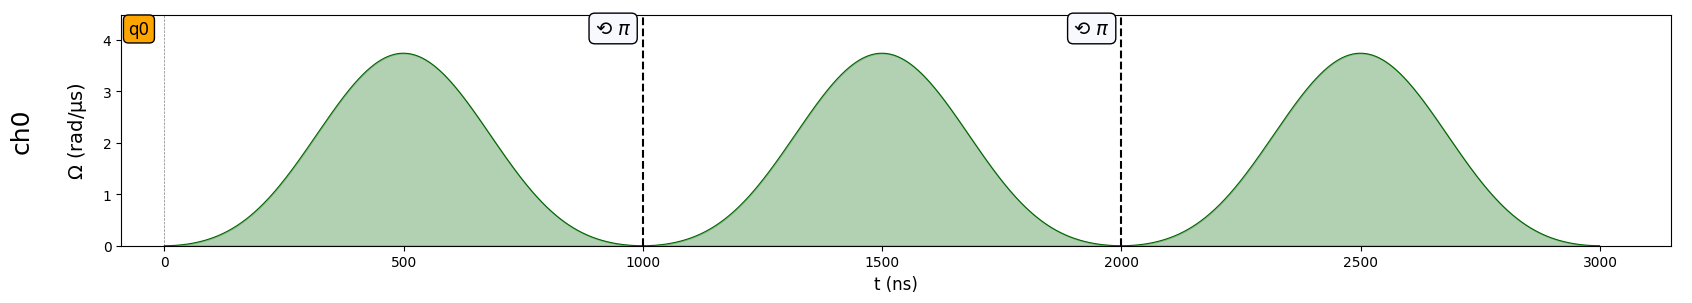

In [15]:
seq.draw(draw_phase_shifts=True)